In [79]:
!pip install kagglehub

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [81]:
import kagglehub

# https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1


In [82]:
df = pd.read_csv(path + '/Churn_Modelling.csv')
print(df.head())
print(df.shape)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [83]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [84]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [85]:
df.select_dtypes(include=['object']).value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
Name: count, dtype: int64

In [86]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True, dtype=int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [87]:
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
model = Sequential()

model.add(
    Dense(
        units=3,
        activation='relu',
        input_dim=11
    )
)

model.add(
    Dense(
        units=1,
        activation='relu'

    )
)

display(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

In [90]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [91]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=500,
    batch_size=32,
    verbose=1
)


Epoch 1/500
250/250 [==============================] - 1s 2ms/step - loss: 3.1932 - accuracy: 0.6924
Epoch 2/500
250/250 [==============================] - 0s 2ms/step - loss: 2.5131 - accuracy: 0.7592
Epoch 3/500
250/250 [==============================] - 0s 2ms/step - loss: 2.3462 - accuracy: 0.7782
Epoch 4/500
250/250 [==============================] - 0s 2ms/step - loss: 2.2781 - accuracy: 0.7832
Epoch 5/500
250/250 [==============================] - 0s 2ms/step - loss: 2.2089 - accuracy: 0.7910
Epoch 6/500
250/250 [==============================] - 0s 2ms/step - loss: 2.1436 - accuracy: 0.7949
Epoch 7/500
250/250 [==============================] - 0s 2ms/step - loss: 2.0043 - accuracy: 0.7965
Epoch 8/500
250/250 [==============================] - 0s 2ms/step - loss: 1.2304 - accuracy: 0.7919
Epoch 9/500
250/250 [==============================] - 0s 2ms/step - loss: 1.0291 - accuracy: 0.7893
Epoch 10/500
250/250 [==============================] - 0s 2ms/step - loss: 0.9250 - accura

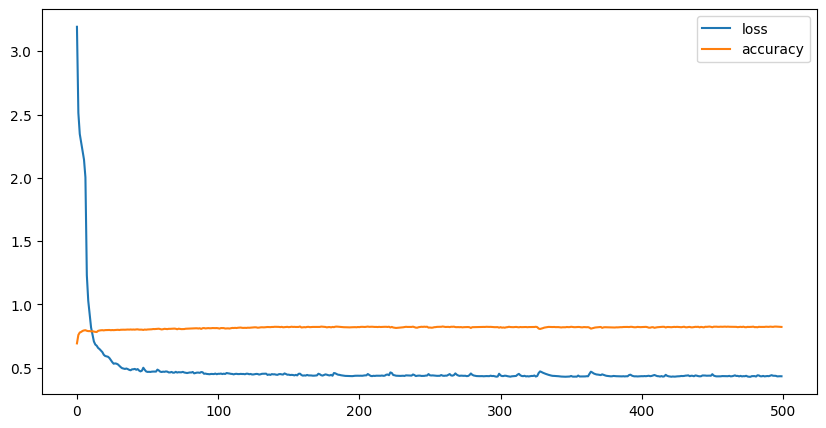

In [106]:
plt.figure(figsize=(10,5))
for c in history.history.keys():
  plt.plot(history.history[c], label=c)
plt.legend()
plt.show()

In [93]:
display(model.layers[0].get_weights())
display(model.layers[0].get_weights())

[array([[ 0.09926375, -0.00541519,  0.03034225],
        [-0.3867685 ,  0.09167576, -0.3994624 ],
        [-0.03024766, -0.07955398, -0.1129306 ],
        [ 0.05721299,  0.18766105,  0.13895932],
        [ 0.00498964,  0.0317464 ,  0.04784521],
        [ 0.0035965 , -0.08659856, -0.11261778],
        [ 0.68845767, -0.5132896 , -0.70953244],
        [ 0.07239148,  0.01337525, -0.03265461],
        [ 0.6456505 ,  0.3111459 ,  0.14118731],
        [-0.01392594, -0.06689532, -0.16476576],
        [ 0.01622218, -0.20416088, -0.1386381 ]], dtype=float32),
 array([0.21784414, 0.5863435 , 0.21626298], dtype=float32)]

[array([[ 0.09926375, -0.00541519,  0.03034225],
        [-0.3867685 ,  0.09167576, -0.3994624 ],
        [-0.03024766, -0.07955398, -0.1129306 ],
        [ 0.05721299,  0.18766105,  0.13895932],
        [ 0.00498964,  0.0317464 ,  0.04784521],
        [ 0.0035965 , -0.08659856, -0.11261778],
        [ 0.68845767, -0.5132896 , -0.70953244],
        [ 0.07239148,  0.01337525, -0.03265461],
        [ 0.6456505 ,  0.3111459 ,  0.14118731],
        [-0.01392594, -0.06689532, -0.16476576],
        [ 0.01622218, -0.20416088, -0.1386381 ]], dtype=float32),
 array([0.21784414, 0.5863435 , 0.21626298], dtype=float32)]

In [94]:
y_pred = np.where(
    model.predict(X_test_scaled) > 0.5,
    1,
    0
)

display(accuracy_score(y_test, y_pred))

display(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step


0.824

'              precision    recall  f1-score   support\n\n           0       0.83      0.98      0.90      1607\n           1       0.69      0.19      0.30       393\n\n    accuracy                           0.82      2000\n   macro avg       0.76      0.58      0.60      2000\nweighted avg       0.80      0.82      0.78      2000\n'

In [95]:
model.evaluate(X_test_scaled,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8240


[0.4131196141242981, 0.8240000009536743]